In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!pip install split-folders

import splitfolders  # or import split_folders

input_folder = '/content/drive/MyDrive/Eye Diseases Virus Dateset Vol 1/JPG'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output='/content/drive/MyDrive/Eye Diseases Virus Dateset Vol 1/JPG2', 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None) # default values


# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# enable oversampling of imbalanced datasets, works only with fixed
splitfolders.fixed(input_folder, output='/content/drive/MyDrive/Eye Diseases Virus Dateset Vol 1/JPG2', 
                   seed=42,fixed=(134, 33), oversample=False, group_prefix=None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/








Copying files: 0 files [00:00, ? files/s]





Copying files: 2 files [00:00, 15.78 files/s]





Copying files: 10 files [00:00, 47.12 files/s]





Copying files: 17 files [00:00, 51.68 files/s]





Copying files: 25 files [00:00, 59.42 files/s]





Copying files: 32 files [00:00, 57.05 files/s]





Copying files: 39 files [00:00, 60.62 files/s]





Copying files: 46 files [00:00, 60.89 files/s]





Copying files: 53 files [00:00, 62.74 files/s]





Copying files: 60 files [00:01, 64.72 files/s]





Copying files: 67 files [00:01, 62.34 files/s]





Copying files: 74 files [00:01, 64.33 files/s]





Copying files: 81 files [00:01, 60.76 files/s]





Copying files: 88 files [00:01, 63.07 files/s]





Copying files: 95 files [00:01, 61.49 files/s]





Copying files: 102 files [00:01, 63.40 files/s]





Copying files: 109 files [00:01, 61.65 files/s]





Copying files: 116 files [00:01, 62.91 files/s]





Copying files: 123 files [00:02, 60.56 files/s]





Copying 

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [18]:
train_path="/content/drive/MyDrive/Eye Diseases Virus Dateset Vol 1/JPG2/train"
test_path="/content/drive/MyDrive/Eye Diseases Virus Dateset Vol 1/JPG2/test"
val_path="/content/drive/MyDrive/Eye Diseases Virus Dateset Vol 1/JPG2/val"

In [19]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)


In [20]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [21]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [22]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [23]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 445 images belonging to 3 classes.
Found 99 images belonging to 3 classes.
Found 435 images belonging to 3 classes.


In [33]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [34]:
training_set.class_indices

{'Blepharitis.jpg': 0,
 'Cellulitis eye.jpg': 1,
 'Conjunctivitis, Pink Eye.jpg': 2}

In [35]:
train_y.shape,test_y.shape,val_y.shape

((445,), (99,), (435,))

In [38]:
# add preprocessing layer to the front of VGG
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [39]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [40]:
x = Flatten()(vgg.output)

In [41]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [42]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [45]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
14/14 [==============================] - 554s 41s/step - loss: 1.8938 - accuracy: 0.4292 - val_loss: 1.6622 - val_accuracy: 0.5172
Epoch 2/10
14/14 [==============================] - 550s 41s/step - loss: 1.1655 - accuracy: 0.6337 - val_loss: 0.9835 - val_accuracy: 0.6368
Epoch 3/10
14/14 [==============================] - 552s 41s/step - loss: 0.7129 - accuracy: 0.6966 - val_loss: 0.8239 - val_accuracy: 0.6782
Epoch 4/10
14/14 [==============================] - 551s 41s/step - loss: 0.4446 - accuracy: 0.8157 - val_loss: 0.6574 - val_accuracy: 0.7103
Epoch 5/10
14/14 [==============================] - 570s 42s/step - loss: 0.3341 - accuracy: 0.8764 - val_loss: 0.4820 - val_accuracy: 0.8391
Epoch 6/10
14/14 [==============================] - 552s 41s/step - loss: 0.2641 - accuracy: 0.9393 - val_loss: 0.4582 - val_accuracy: 0.8552
Epoch 7/10
14/14 [==============================] - 551s 41s/step - loss: 0.2288 - accuracy: 0.9596 - val_loss: 0.4967 - val_accuracy: 0.8345
Epoch 

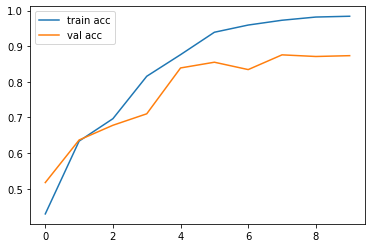

In [46]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

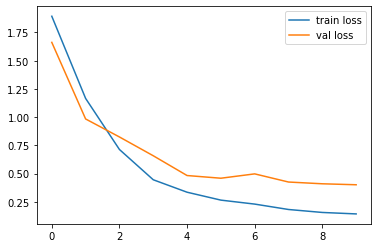

In [47]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [48]:
model.evaluate(test_x,test_y,batch_size=32)

4/4 [==============================] - 64s 14s/step - loss: 1.0162 - accuracy: 0.5657


[1.0162321329116821, 0.5656565427780151]

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [50]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [51]:
#get classification report
print(classification_report(y_pred,test_y))


              precision    recall  f1-score   support

           0       0.33      0.55      0.42        20
           1       0.79      0.62      0.69        42
           2       0.58      0.51      0.54        37

    accuracy                           0.57        99
   macro avg       0.57      0.56      0.55        99
weighted avg       0.62      0.57      0.58        99



In [52]:
print(confusion_matrix(y_pred,test_y))

[[11  2  7]
 [ 9 26  7]
 [13  5 19]]
